第14章　時刻歴データ分析

14.1　時系列データ分析とは

14.2　分析データの準備

初期設定：これまでと同様に、初期設定を行います。

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib

In [2]:
# ライブラリのimport

# numpy用ライブラリ
import numpy as np

# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt

# pandas用ライブラリ
import pandas as pd

# データフレーム表示用関数
from IPython.display import display

# *** 新たに追加する設定 ***
# *** seabornのインポート ***
import seaborn as sns

# *** Pythonの標準ライブラリ datetime を拡張するサードパーティライブラリの設定 ***
from dateutil.relativedelta import relativedelta

# *** datetimeライブラリインポート (Python のdatetimeを使う場合に設定) ***
# from datetime import datetime

In [3]:
# 表示オプション調整

# numpy表示形式の設定
np.set_printoptions(
    suppress=True, precision=4, floatmode='fixed'
)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 12
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True

# データフレームでの表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

Google Colaboratoryへのマウント

In [4]:
# Google Colaboratoryへのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


14.1　時系列データ分析とは

14.2　分析データの準備

In [5]:
# コード14.2.1　CSVファイルの読み込み
df1 = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Python_Txt_toshimitsu/data14-2_Time-History.csv',
    header = 1
)
display(df1.head(2))
display(df1.shape)

,時刻,気温,1系統冷水熱量,2系統冷水熱量
0,2022/6/18 0:00,23.8000,0.0000,0.0000
1,2022/6/18 1:00,23.8000,0.0000,0.0000


(1345, 4)

データ型確認

In [6]:
# コード14.2.2 各項目のデータ型確認
df1.dtypes

,0
時刻,object
気温,float64
1系統冷水熱量,float64
2系統冷水熱量,float64


In [11]:
# コード14.2.3(a) 読み込んだCSVファイルの文字型「時刻」の列を，datetime型にする

# (1) データフレームのコピー
df2 = df1.copy()
display(df2.head(2))

# (2) 文字型の日付データをdatetime型に変換した列データを作成
date_objects = pd.to_datetime(df2['時刻'])
print()
print('*** datetime型に変換した列データ[時刻] ')
print(date_objects.head(2))

# (3) 作成した新しいdatetime型に変換した列データを第0行に挿入
df2.insert(0, '時刻new', date_objects)

# (4) 列項目「時刻」を削除
df2 = df2.drop('時刻', axis=1)

# (5) 列名「時刻new」を「時刻」に変更
df2 = df2.rename(columns={'時刻new': '時刻'})
print('*** datetime型に変換したデータフレーム')
# (6) df2を確認
display(df2.head(2))
display(df2.shape)

,時刻,気温,1系統冷水熱量,2系統冷水熱量
0,2022/6/18 0:00,23.8000,0.0000,0.0000
1,2022/6/18 1:00,23.8000,0.0000,0.0000



*** datetime型に変換した列データ[時刻] 
0   2022-06-18 00:00:00
1   2022-06-18 01:00:00
Name: 時刻, dtype: datetime64[ns]
*** datetime型に変換したデータフレーム


,時刻,気温,1系統冷水熱量,2系統冷水熱量
0,2022-06-18 00:00:00,23.8000,0.0000,0.0000
1,2022-06-18 01:00:00,23.8000,0.0000,0.0000


(1345, 4)

In [8]:
# コード14.2.3(b)　CSVファイルの読み込みで，項目「時刻」にparse_dates=[0]でdatetime型を指定
df2 = pd.read_csv(
    '/content/drive/My Drive/Colab Notebooks/Python_Txt_toshimitsu/data14-2_Time-History.csv',
    header = 1, parse_dates=[0]
)
display(df2.head(2))

,時刻,気温,1系統冷水熱量,2系統冷水熱量
0,2022-06-18 00:00:00,23.8000,0.0000,0.0000
1,2022-06-18 01:00:00,23.8000,0.0000,0.0000


In [9]:
# コード14.2.4 各項目のデータ型再確認
df2.dtypes

,0
時刻,datetime64[ns]
気温,float64
1系統冷水熱量,float64
2系統冷水熱量,float64


欠損値確認

In [10]:
# コード14.2.5　欠損値の確認
df2.isnull().sum()

,0
時刻,0
気温,0
1系統冷水熱量,0
2系統冷水熱量,0


14.3　分析データの把握

<Axes: xlabel='時刻'>

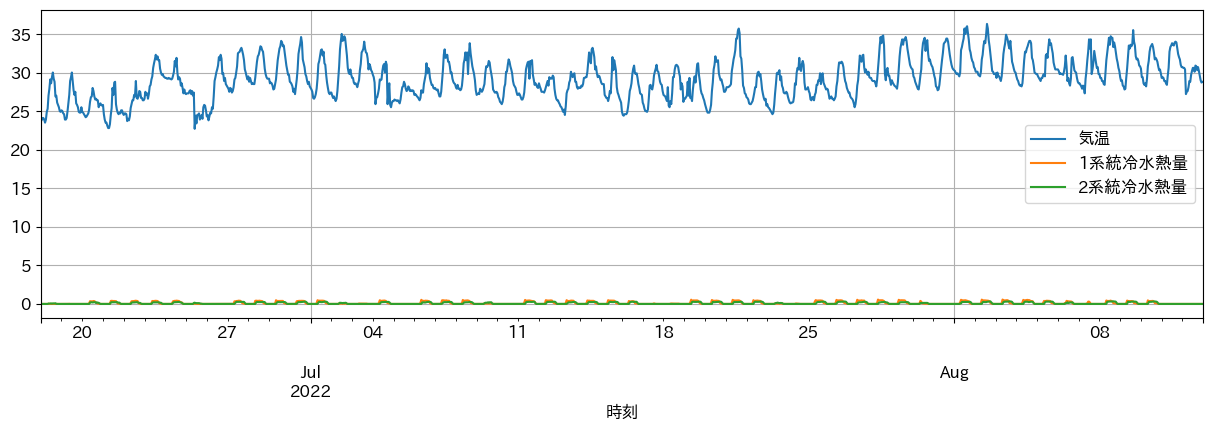

In [ ]:
# コード14.3.1　全ての数値型の列データを折れ線グラフで表示する
# DataFrameにplot()メソッドを適用するとデフォルトでは折れ線グラフが描画される。
# グラフ化されるのは数値の列のみで文字列の列は除外される。
# グラフサイズの調整
plt.rcParams['figure.figsize'] = (15, 4)

# グラフ描画
df2.plot(x='時刻')

<Axes: xlabel='時刻'>

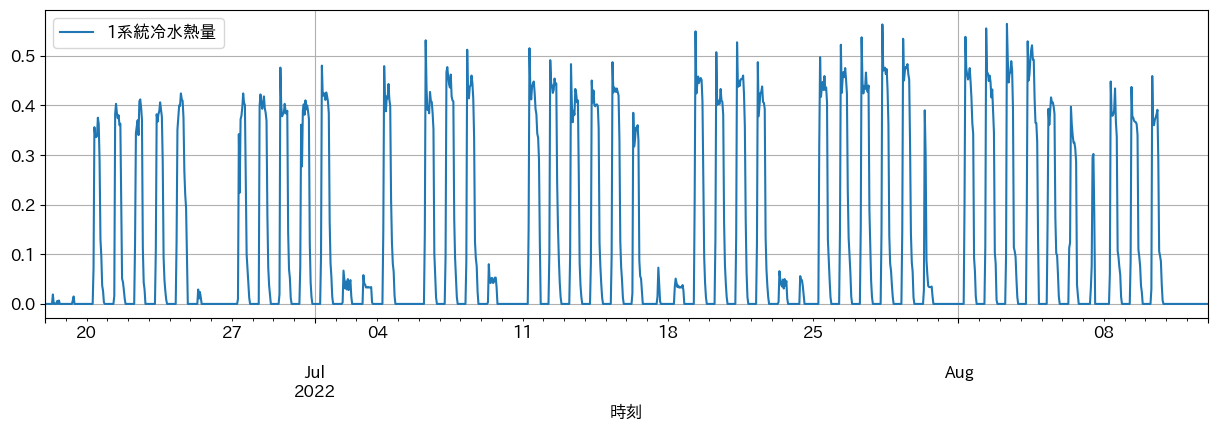

In [ ]:
# コード14.3.2　1系統冷水熱量の列データの折れ線グラフを表示する
df2.plot(x='時刻', y='1系統冷水熱量')

14.4　日付・時間に関する処理（to_datetime関数，relativedelta関数）

In [ ]:
# コード14.4.1　日付範囲指定を指定してデータを抽出
# (1)
# 開始日　datetime型で定義
day_sta = pd.to_datetime('2022-06-20')
# 終了日　datetime型で定義
day_end = pd.to_datetime('2022-07-4')

# データ型の確認
print(day_sta, type(day_sta))
print(day_end, type(day_end))

# (2)queryメソッドで絞り込み　検索条件はすべて変数で指定
term7 = df2.query(
    '時刻 >=@day_sta and 時刻 <= @day_end')

# (3)結果確認
display(term7)

2022-06-20 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2022-07-04 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


,時刻,気温,1系統冷水熱量,2系統冷水熱量
48,2022-06-20 00:00:00,24.9000,0.0000,0.0000
49,2022-06-20 01:00:00,24.8000,0.0000,0.0000
50,2022-06-20 02:00:00,24.6000,0.0000,0.0000
51,2022-06-20 03:00:00,24.4000,0.0000,0.0000
52,2022-06-20 04:00:00,24.2000,0.0000,0.0000
...,...,...,...,...
380,2022-07-03 20:00:00,31.1000,0.0000,0.0000
381,2022-07-03 21:00:00,30.8000,0.0000,0.0000
382,2022-07-03 22:00:00,30.3000,0.0000,0.0000
383,2022-07-03 23:00:00,30.1000,0.0000,0.0000


<Axes: xlabel='時刻'>

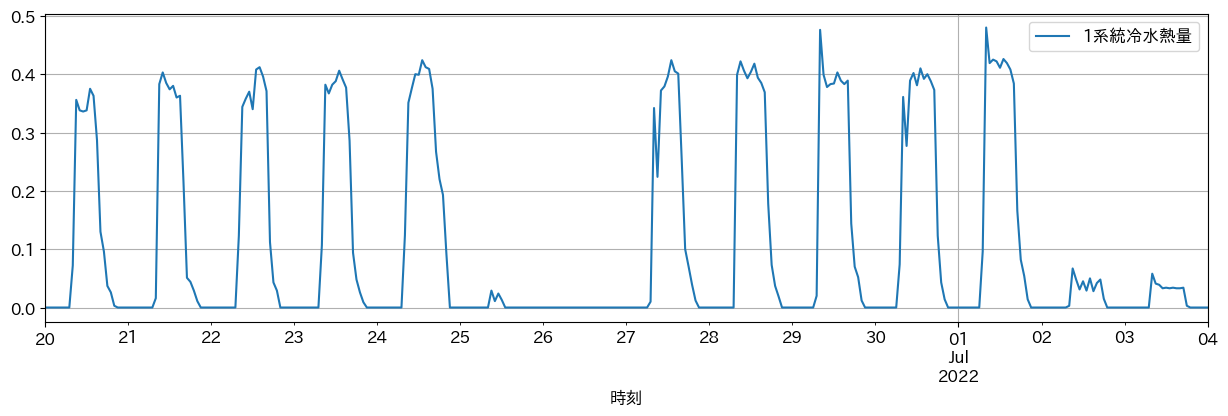

In [ ]:
# コード14.4.2　グラフ表示
term7.plot(x='時刻', y='1系統冷水熱量')

In [ ]:
# コード14.4.3　基準日から数えた日数を指定して期間を指定

# 基準日付
t0 = term7['時刻'].iloc[264]
# 4日後
term_sta = t0 + relativedelta(days=4)
# 14日後
term_end = t0 + relativedelta(days=14)

# 結果確認
print(t0, type(t0))
print(term_sta, type(term_sta))
print(term_end, type(term_end))

2022-07-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2022-07-05 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2022-07-15 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# コード14.4.4　指定した期間でデータを抽出
# 絞り込みの条件式
term10 = df2.query('時刻 >=@term_sta and 時刻 <= @term_end')

# 結果確認
display(term10)

,時刻,気温,1系統冷水熱量,2系統冷水熱量
408,2022-07-05 00:00:00,26.3000,0.0000,0.0000
409,2022-07-05 01:00:00,26.5000,0.0000,0.0000
410,2022-07-05 02:00:00,26.4000,0.0000,0.0000
411,2022-07-05 03:00:00,26.4000,0.0000,0.0000
412,2022-07-05 04:00:00,26.3000,0.0000,0.0000
...,...,...,...,...
644,2022-07-14 20:00:00,29.4000,0.0130,0.0740
645,2022-07-14 21:00:00,29.6000,0.0000,0.0000
646,2022-07-14 22:00:00,29.5000,0.0000,0.0000
647,2022-07-14 23:00:00,29.1000,0.0000,0.0000


14.5　分析データの加工（内挿でデータ間隔を細かくしてデータ数を増やす）

In [ ]:
# コード14.5.1　データセットdf2の1時間毎のデータを内挿分割

# (1)
# 時刻データを内挿する関数を定義する。
def interpolateToTime(a, b, ndiv):
    new_time = pd.date_range(start = a, end = b, periods=ndiv)
    return new_time

# 数値データを内挿する関数を定義する。
def interpolateToData(a, b, ndiv):
    # linspace関数を使って各1時間毎の時間以外のデータを等分割する
    new_data = np.linspace(a, b, ndiv)
    return new_data

# 内挿区間（両端を含めた）の分割点数を指定
ndiv = 7

# (2)新しく作成する空のデータフレーム（df_interpolated) を定義
df_interpolated = pd.DataFrame()

# (3)ループ処理で分割・書込
for i in range(len(df2) - 1):
    # 時刻データを内挿関数による時刻データの分割
    time_series = interpolateToTime(df2.loc[i, '時刻'], df2.loc[i+1, '時刻'], ndiv)
    # 数値データを内挿関数による各列データの分割
    DTemp = interpolateToData(df2.loc[i, '気温'], df2.loc[i+1, '気温'], ndiv)
    NewData1 = interpolateToData(df2.loc[i, '1系統冷水熱量'], df2.loc[i+1, '1系統冷水熱量'], ndiv)
    NewData2 = interpolateToData(df2.loc[i, '2系統冷水熱量'], df2.loc[i+1, '2系統冷水熱量'], ndiv)

    # 分割したデータを新しく作成する空のデータフレーム（df_interpolated)に追加するため、インデックスを指定する
    temp_df = pd.DataFrame({
        '時刻': time_series,
        '気温': DTemp,
        '1系統冷水熱量': NewData1,
        '2系統冷水熱量': NewData2
    })

    # 内挿したデータを新しく作成する空のデータフレーム（df_interpolated)に追加
    # ただし、最後のデータを除く
    df_interpolated = pd.concat([df_interpolated, temp_df.iloc[:-1]], ignore_index=True)

# (4)除いた最後のデータとして、元のデータ(df2)の最後のデータを加える
df_interpolated = pd.concat([df_interpolated, df2.iloc[[-1]]], ignore_index=True)

# (5)作ったデータフレーム（df_interpolated) の最初と最後の8行部分を表示
display(df_interpolated.head(8))
display(df_interpolated.tail(8))
display(df_interpolated.shape)

,時刻,気温,1系統冷水熱量,2系統冷水熱量
0,2022-06-18 00:00:00,23.8000,0.0000,0.0000
1,2022-06-18 00:10:00,23.8000,0.0000,0.0000
2,2022-06-18 00:20:00,23.8000,0.0000,0.0000
3,2022-06-18 00:30:00,23.8000,0.0000,0.0000
4,2022-06-18 00:40:00,23.8000,0.0000,0.0000
5,2022-06-18 00:50:00,23.8000,0.0000,0.0000
6,2022-06-18 01:00:00,23.8000,0.0000,0.0000
7,2022-06-18 01:10:00,23.8500,0.0000,0.0000


,時刻,気温,1系統冷水熱量,2系統冷水熱量
8057,2022-08-12 22:50:00,28.7833,0.0000,0.0000
8058,2022-08-12 23:00:00,28.8000,0.0000,0.0000
8059,2022-08-12 23:10:00,28.8000,0.0000,0.0000
8060,2022-08-12 23:20:00,28.8000,0.0000,0.0000
8061,2022-08-12 23:30:00,28.8000,0.0000,0.0000
8062,2022-08-12 23:40:00,28.8000,0.0000,0.0000
8063,2022-08-12 23:50:00,28.8000,0.0000,0.0000
8064,2022-08-13 00:00:00,28.8000,0.0000,0.0000


(8065, 4)

In [ ]:
# コード14.5.2　作成したデータセットの保存
# 作ったデータフレーム（df_interpolated)をCSVファイルで保存
# この場合はindex=Falseオプションを付ける

df_interpolated.to_csv('/content/drive/My Drive/Colab Notebooks/Python_Txt_toshimitsu/data14-4_df.csv', index =False)